In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
#,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/CAR DETAILS(capstone,6 july).csv")

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [8]:
df.shape

(4340, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
df.isnull().sum().sum()/df.index.size

0.0

In [11]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [12]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [13]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [14]:
df.year.unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [15]:
df.selling_price.unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [16]:
df.km_driven.unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,   5000,  33000,  28000,  59000,   4500,
       175900,  14500,  15000,  33800, 130400,  80000,  10000, 119000,
        75800,  40000,  74000,  64000, 120000,  79000,  18500,  10200,
        29000,  90000,  73300,  92000,  66764, 350000, 230000,  31000,
        39000, 166000, 110000,  54000,  63000,  76000,  11958,  20000,
         9000,   6500,  58000,  62200,  34000,  53000,  49000,  63500,
         9800,  13000,  21000,  29173,  48000,  30000,  87000,  16000,
        79350,  81000,   3600,  14272,  49213,  57000,   3240, 114000,
        53772, 140000, 175000,  36000, 155500,  23000,  22155,  78380,
       150000,  80362,  55000,   1136,  43000,   2650, 115962,  65000,
        56000, 213000, 139000, 160000, 163000,  32000,  52000,  11240,
        66000,  26500,  72000,  44000, 130000, 195000, 155000,   4000,
        41000,  10832,  14681,  51000, 200000,  19600,  46730,  21170,
      

In [17]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [18]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [19]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
df[df['km_driven']>200000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
225,Mahindra Renault Logan 1.5 DLS,2008,89999,213000,Diesel,Individual,Manual,First Owner
324,Mahindra XUV500 W8 2WD,2012,850000,212814,Diesel,Dealer,Manual,First Owner
394,Mahindra Scorpio REV 116,2006,220000,220000,Petrol,Individual,Manual,Second Owner
502,Maruti Swift Ldi BSIII,2009,300000,217871,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
656,Tata Safari Storme VX,2013,360000,206500,Diesel,Individual,Manual,First Owner
821,Hyundai EON Magna Plus,2013,125000,205000,Petrol,Individual,Manual,First Owner


In [32]:
df[df['selling_price']>1000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
25,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
4274,Hyundai Verna CRDi 1.6 AT EX,2018,1100000,25000,Diesel,Individual,Automatic,Second Owner
4302,BMW 7 Series 730Ld,2006,1050000,30000,Diesel,Dealer,Automatic,First Owner
4304,Audi Q5 3.0 TDI Quattro Technology,2018,3899000,22000,Diesel,Dealer,Automatic,First Owner
4311,Toyota Camry Hybrid 2.5,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner


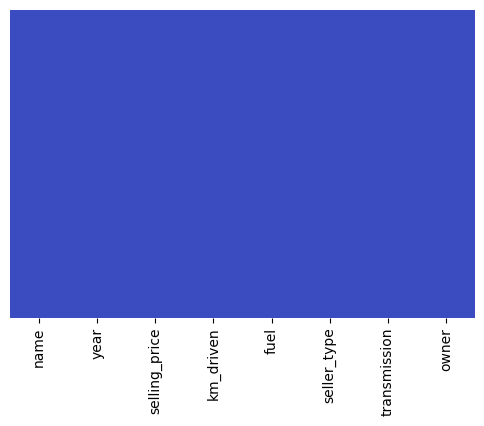

In [33]:
plt.figure(figsize = (6,4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [34]:
df.duplicated().sum()

763

In [35]:
# view duplicate values
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


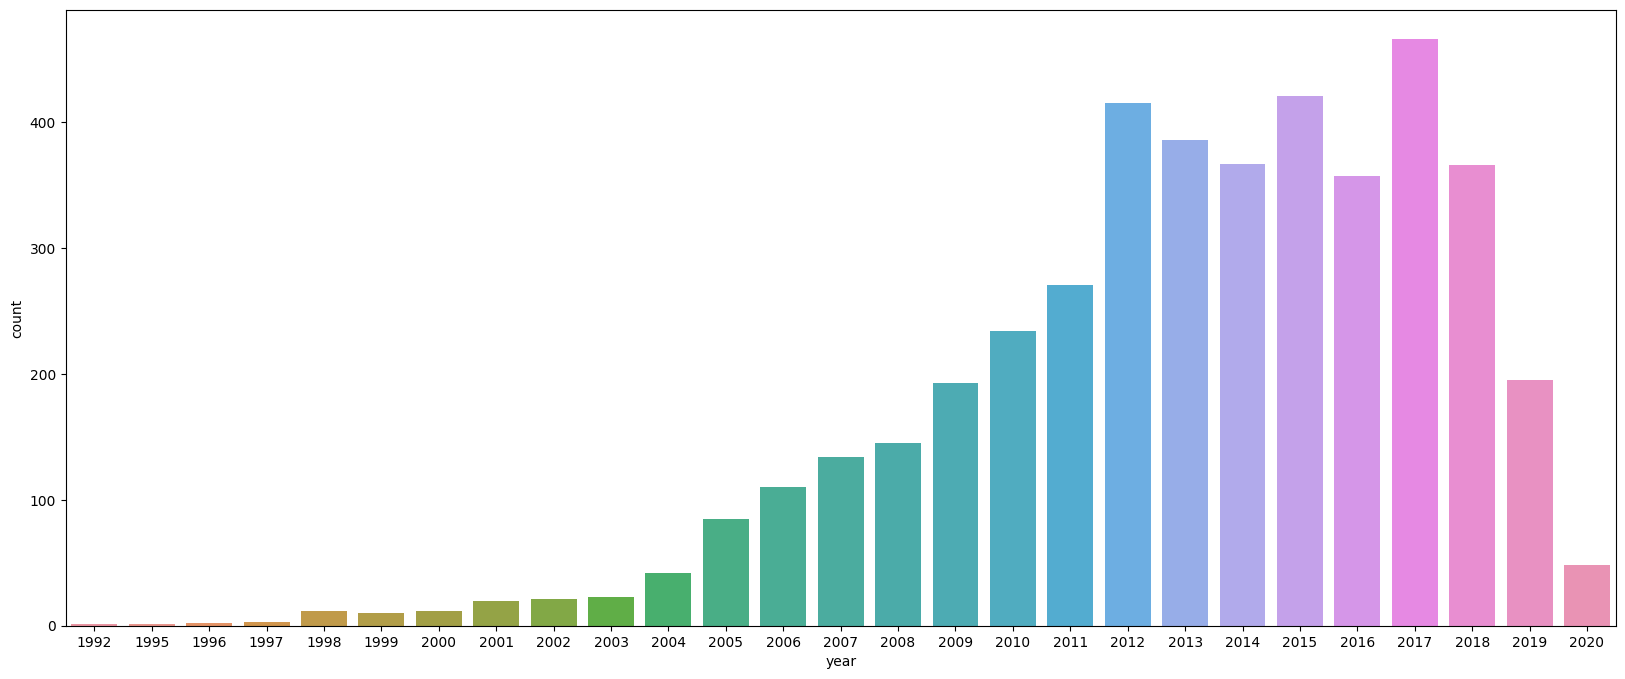

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['year']);

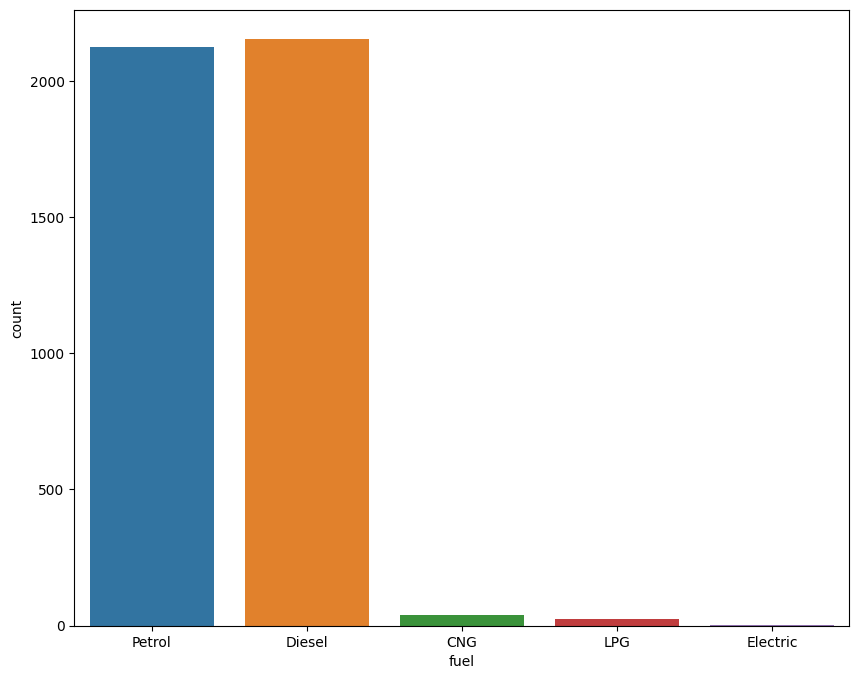

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['fuel']);

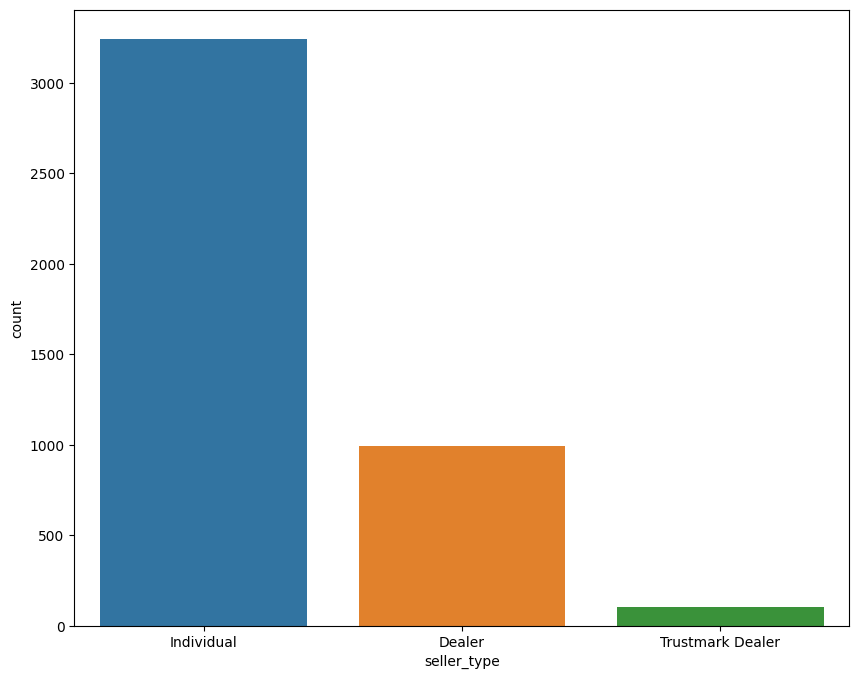

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['seller_type']);

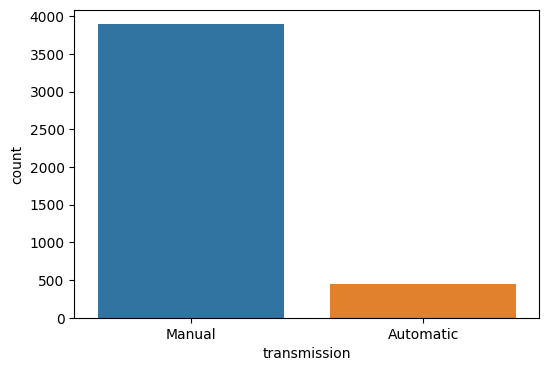

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['transmission']);

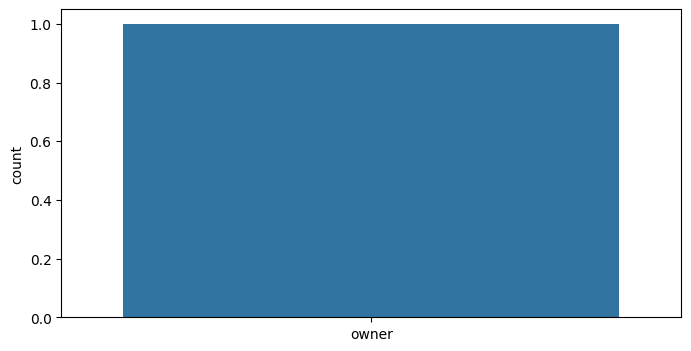

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x=['owner']);

<Axes: >

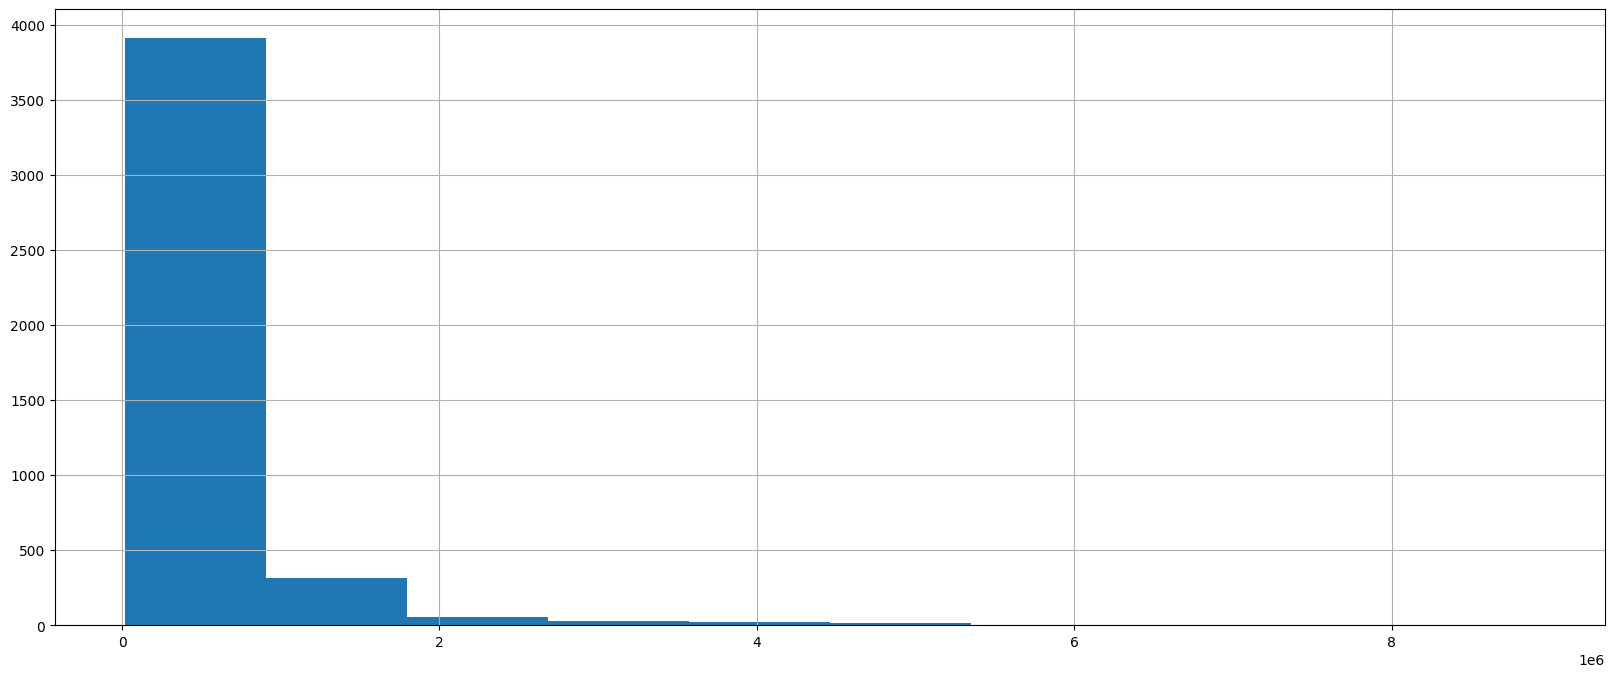

In [41]:
plt.figure(figsize=(20,8))
df['selling_price'].hist()

<Axes: >

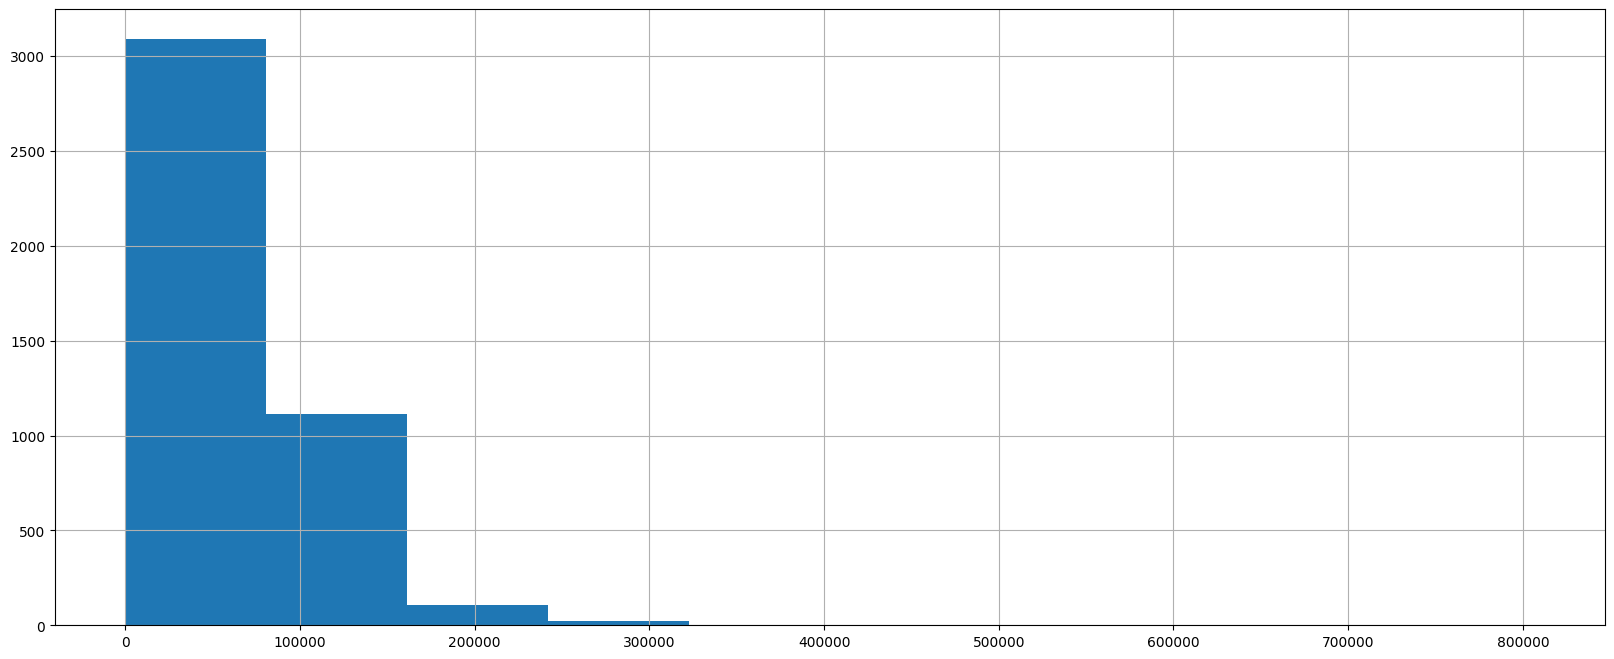

In [42]:
plt.figure(figsize=(20,8))
df['km_driven'].hist()

In [43]:
# There are duplicate values, but we will not delete them because it is natural that there are duplicate values,
# Normal same model car was sold many times

# Now we move on to the next stage, which is data analysis
# Let's start trying to find out What is the most sold car??

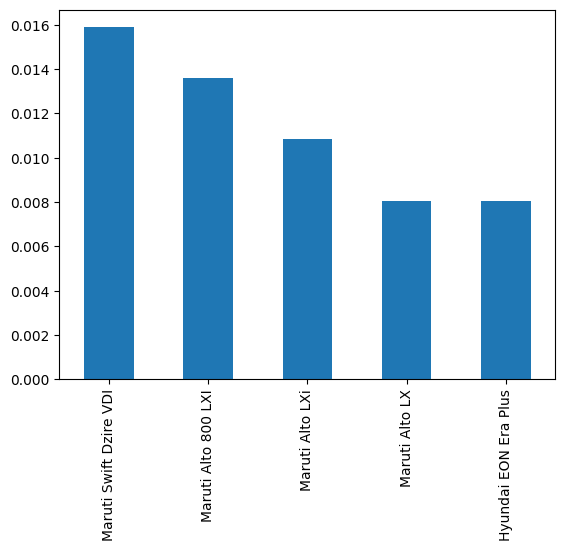

In [44]:
#we use (value_counts) to know to know the sold numbers of each car use (plot) to draw the graph
df["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()

In [45]:
# Now we have a note on the names of the cars in detail
# We want to extract reports based on the brands,so we will add a column contain the brand for each car
# and we will build it by separating the first part of the name of each car in to create a new column with the brands only

In [46]:
#add new coulmn by brand name split first part
df["brand"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))#Cuts first word only(car brand)from name column
df['brand'] # New column review

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 4340, dtype: object

In [47]:
#To know countnvalue in coulmn
df.brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

In [48]:
# We want to know the average prices of the brands###

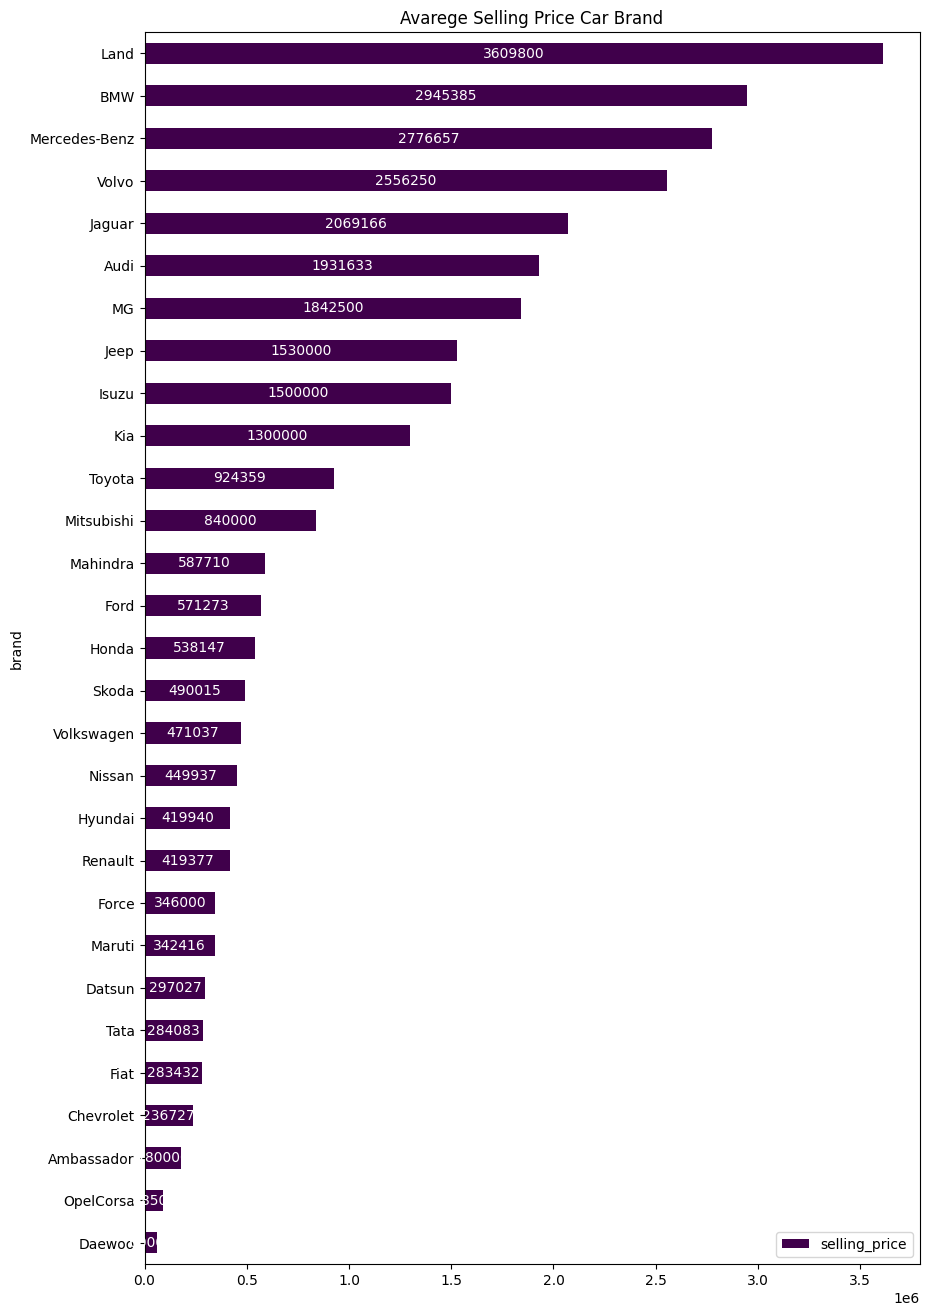

In [49]:
#we use groupby and mean to extract values and plot to draw the graph
price = df.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Avarege Selling Price Car Brand')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

In [50]:
# Now trying to find out the sales classified by brand

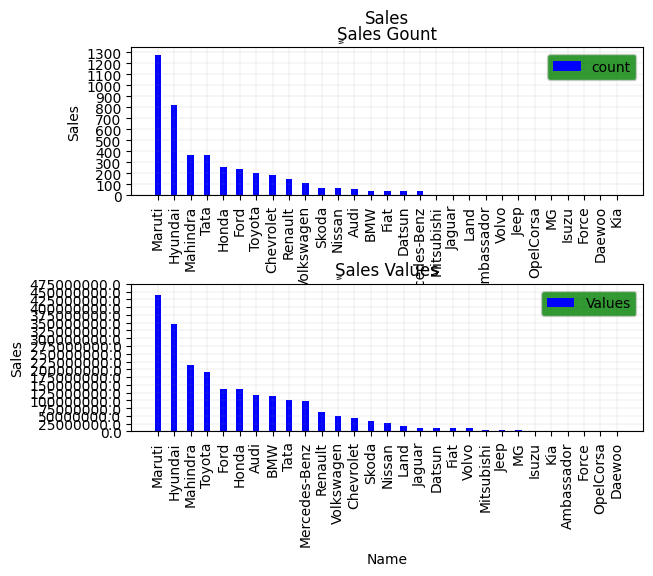

In [51]:
# We will display sales by count and value in separate graphs

#plot 1:
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False) #to extract the count
x = data.index # to extract the brand name
y = data.values # to extract the count to brand
plt.subplot(2, 1, 1)#The location of the first graph 2 1 1
#the figure has 2 row, 1 columns, and this plot is the first plot.
plt.bar(x, y, color ='blue',width = 0.4)#Fomat to plt.bar
plt.rcParams['axes.facecolor'] = '#FFFFFF'#background color
plt.xticks(rotation=90) #Make the text of the label Make the text of the label at  angle 90
plt.xlabel("Name",fontsize=10,color="black")#Fomat and name to x
plt.ylabel("Sales",fontsize=10,color="black")#Fomat and name to y
plt.title("ٍSales Gount",color="black")#Fomat and name to title
plt.legend(["count"], loc ="upper right" ,facecolor='green', labelcolor='black')#Fomat and name to legend
plt.rcParams['figure.figsize'] = [10, 10]#Determine the size of the graph
plt.grid(color='grey', linestyle='-', linewidth=.1)#Fomat grid network that appears in graph background
#plt.xlim([0, 1]) #
#plt.ylim([0, 2000])#
#plt.locator_params(axis='x', nbins=20)#
plt.locator_params(axis='y', nbins=20)# to make y texts 100-200-300-- like that

#plot 2:
plt.subplot(2, 1, 2)#The location of the second graph 2 1 2
#the figure has 2 row, 1 columns, and this plot is the second plot.
data = df.groupby(['brand'])['selling_price'].sum().sort_values(ascending=False)
x = data.index # to extract the brand name
y = data.values #to extract the sum to brand
plt.bar(x, y, color ='blue',width = 0.4)
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Sales",fontsize=10,color="black")
plt.title("ٍSales Values",color="black")
plt.legend(["Values"], loc ="upper right" ,facecolor='green', labelcolor='black')
plt.rcParams['figure.figsize'] = [10, 10]
plt.grid(color='grey', linestyle='-', linewidth=.1)
#plt.xlim([0, 1])
#plt.ylim([0, 2000])
#plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=20)
#plt.margins(x=0, y=0)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])# Show real values,numbers big without it appear short
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.5, hspace=0.6)# set the spacing between subplots
plt.suptitle("Sales")#Name for the whole graph
plt.show()#view

In [52]:
# We will try another graph to display sales

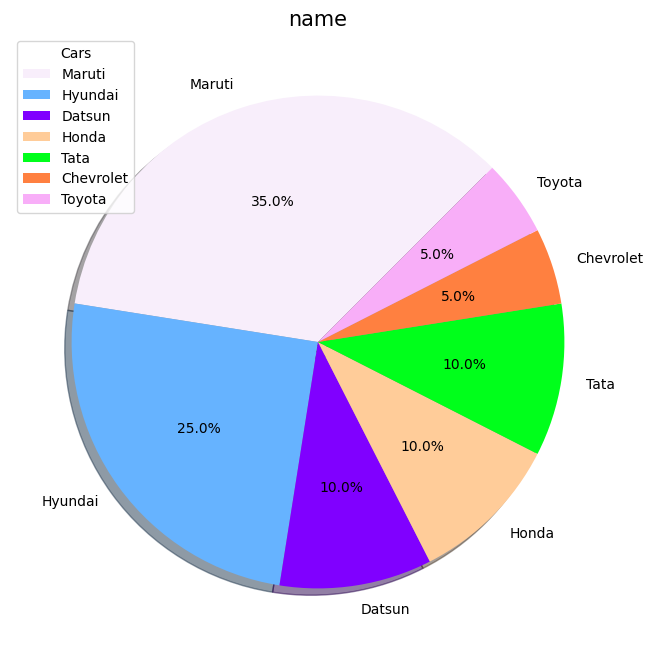

In [53]:
## We will display sales by count in pie graphs
labels = df["brand"][:20].value_counts().index #We chose only twenty
sizes = df["brand"][:20].value_counts() # We chose only twenty
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)#to extract the count
x = data.index #to extract the brand name
y = data.values#to extract the count to brand
colors = ['#F8EEFB','#66b3ff','#8000FF','#ffcc99',"#00FF1B","#FF8040","#F8AEF8"]#color choice
plt.figure(figsize = (8,8))#Determine the size of the graph
# Creating explode data
#explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)#Fomat pie
plt.title('name',color = 'black',fontsize = 15)#Fomat title
#plt.legend()#
plt.legend(title = "Cars")#title legend
#plt.legend(wedges, cars, title ="Cars",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#myexplode = [0.2, 0, 0, 0]
plt.show()#view

In [54]:
# We note that Maruti Hyundai best selling brands now from just looking at the graphs
# we have information about what is the most best selling brand , by count , by value
# we have now an idea about the sales, categorized by car brand
# but we also want analyze the data from another point of view for more comprehensive vision

In [55]:
####Analysis by year

In [56]:
#To know countnvalue in year coulmn
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

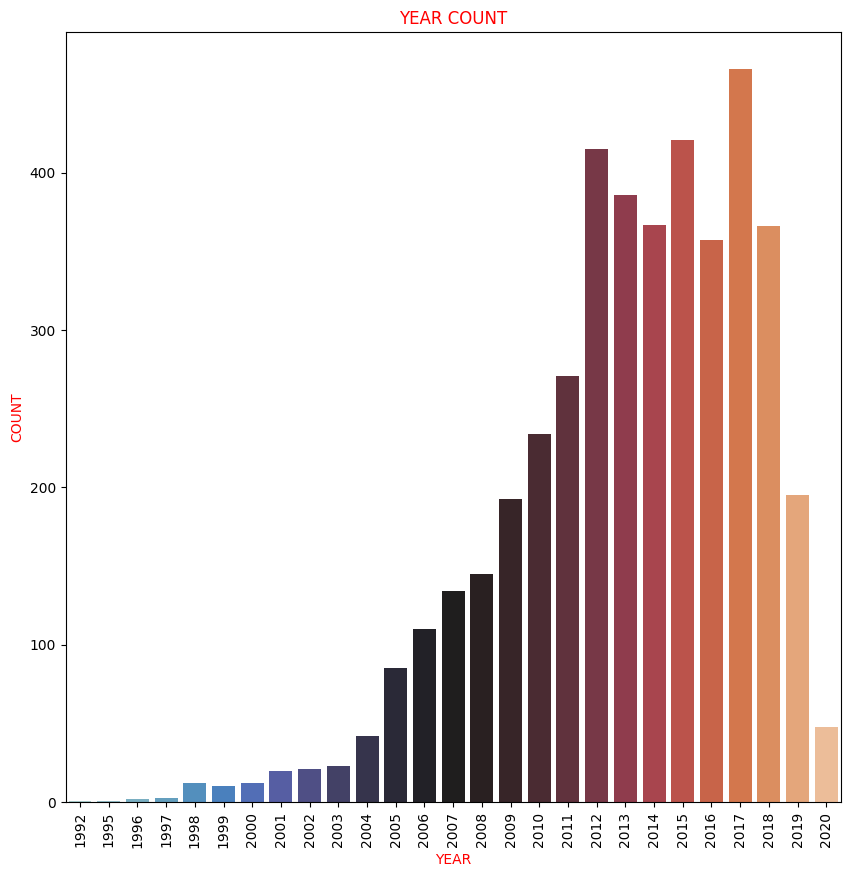

In [57]:
#Here I am using another way to display the graph by seaborn we imported it in the beginning
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

In [58]:
#Just by looking at the graph we know which year sales in it the highest, and see the variance between sales over the years¶

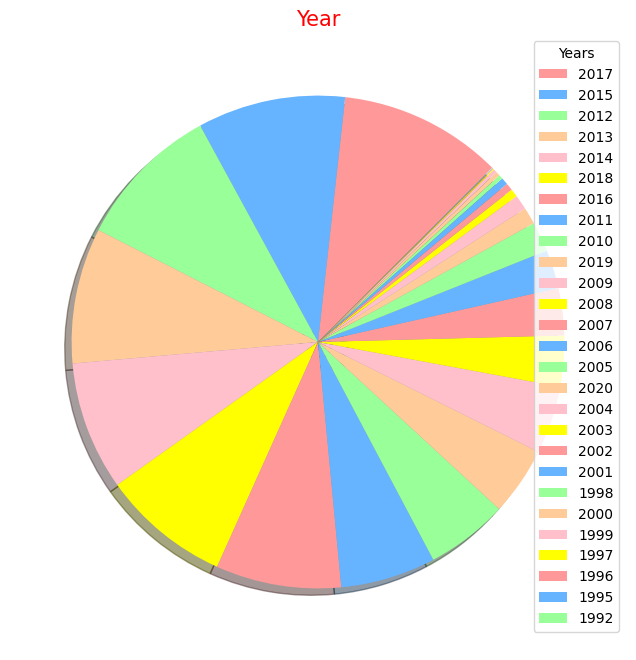

In [59]:
#We will display pie graphs
labels = df["year"].value_counts().index
sizes = df["year"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels , rotatelabels=False, autopct=None,colors=colors,shadow=True, startangle=45, labeldistance=None)
plt.title('Year',color = 'red',fontsize = 15)
plt.legend(title = "Years", loc='upper right')#title legend
plt.show()

In [60]:
# If it is noticed that sales are not stable during the years,
# they were increase during the first years, but last two years decreased a lot

In [61]:
# Another graph to view sales classified by fuel

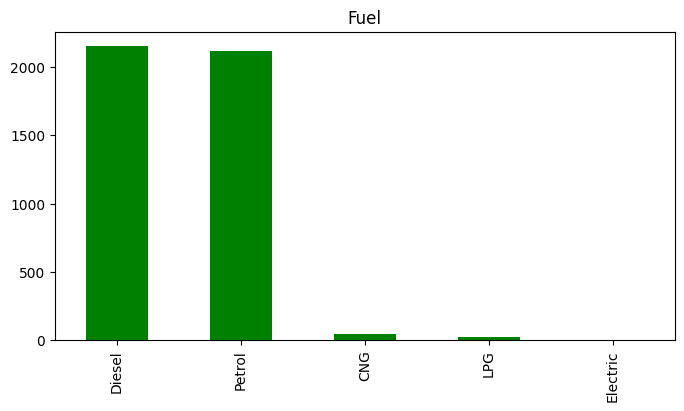

In [62]:
#We will display bar graphs
df["fuel"].value_counts(sort =True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Fuel');

In [63]:
#Best sales diesel and petrol it is clear that the type of fuel affects on sales

In [64]:
# Graph to view sales classified by seller type

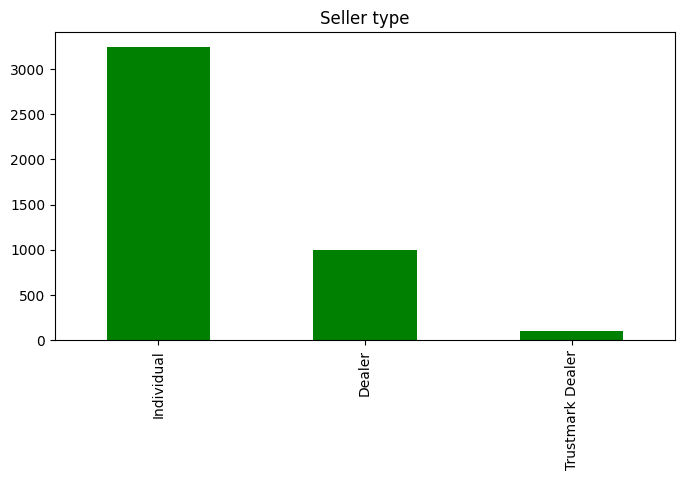

In [65]:
#We will display bar graphs
df["seller_type"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Seller type');

In [66]:
#Best sales come from individual this note is important maybe unexpected

In [67]:
# Graph to view sales classified by transmission

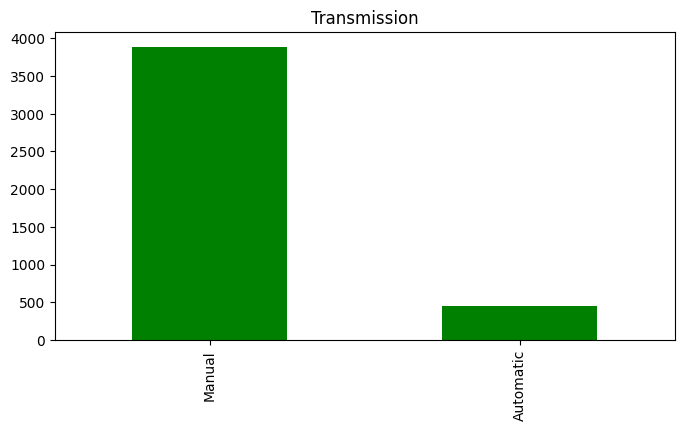

In [68]:
#We will display bar graphs
df["transmission"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Transmission');

In [69]:
#Best sales come from manual or automatic this is a strange thing
#Expected that the automatic sell more, but what happened is that the manual is the sell more
#so we should search and ask for the reason

In [70]:
# Best sales be the first owner this is expected and normal

In [71]:
#Let's now move to another stage of data analysis
#I want to know a little about the relationships between different factors and the price of a car
#I want to know about the relationship between the various factors and price of the car
#What is the most important factor affecting the price of a car?
#Let's draw a graph linking the year to the selling price

In [72]:
#We will display bar graphs line
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data , palette="tab10", linewidth=3.0)
    plt.title(title, fontsize=12)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=16)

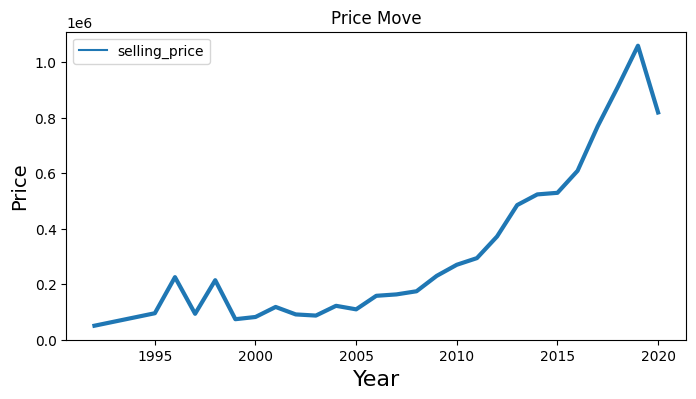

In [73]:
df_price_move = df.groupby(['year'])[['selling_price']].mean()
line_plot(df_price_move,'Price Move', 'Year', "Price")

In [74]:
# The price always increases over the years, and this is normal and expected, but the last years get down
#and this is not normal
# We should ask about and research about this matter.
# The relationship between km_driven and price

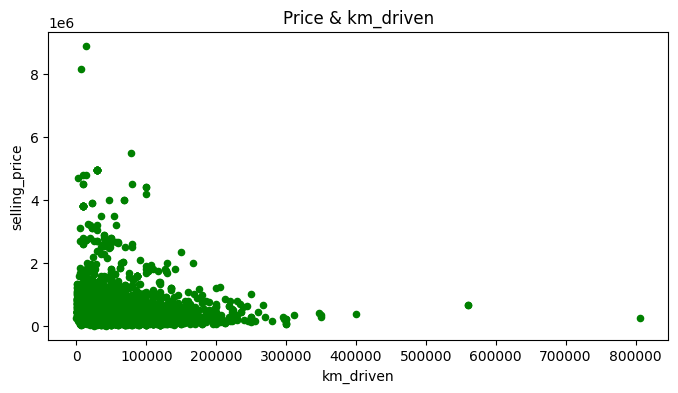

In [75]:
#We will display bar graphs scatter
df.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & km_driven", color="green");

In [76]:
# An expected result, kilometers more mean the price of the car get down
# The relationship between km_driven and year

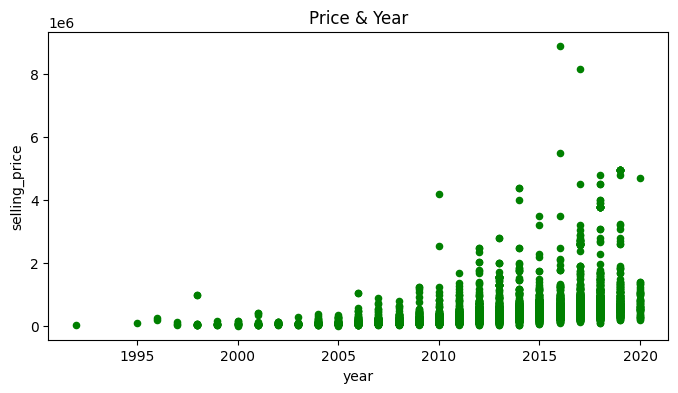

In [77]:
#We will display bar graphs scatter
df.plot(x="year", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & Year", color="green");

In [78]:
# This result we got before from an different graph , but here we just Show it by different graph
# Now examine the correlation between the different factors

In [79]:
# finds the correlation
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [80]:
#we extracted the numeric factors and ignored the other factors because they are texts and this is a problem Note here the positive correlation between the year and the price, meaning that every new year the price increases and a negative correlation between kilometers abnd price when it increases, the price decreases Let's show that in heatmap

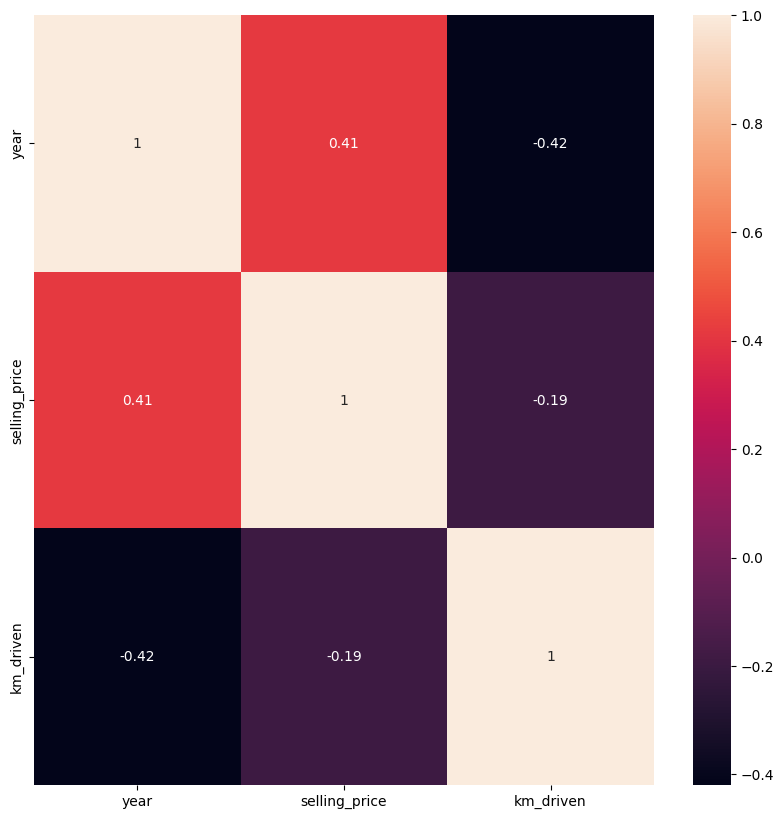

In [81]:
#We will display heatmap
corr = df.corr()
corr = corr['selling_price']
corr = corr.sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [82]:
#Now we will try to find solution to the problem that there are many factors that affect on price but they are not numerical Therefore, we need to modify them, they should be numbers so that we can draw another different heat map that includes all factors.

In [83]:
# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
# limit to categorical data using df.select_dtypes()
data2 = df.select_dtypes(include=[object])#Extracting non-numeric columns
data2.head(3)

,name,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,Hyundai


In [84]:
#We will convert these columns to numbers (name--owner--brand) something like that {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 0}

In [85]:
#name--owner--brand convert these columns to numbers
le = preprocessing.LabelEncoder()
df['name']= le.fit_transform(df['name'])
df['owner']= le.fit_transform(df['owner'])
df['brand']= le.fit_transform(df['brand'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9


In [86]:
#convert these columns (fuel, seller_type, transmission)
enc = OneHotEncoder(sparse = False)
X4 = df[["fuel", "seller_type", "transmission"]]
X5 = enc.fit_transform(X4)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission"])
df[new_col] = X5
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


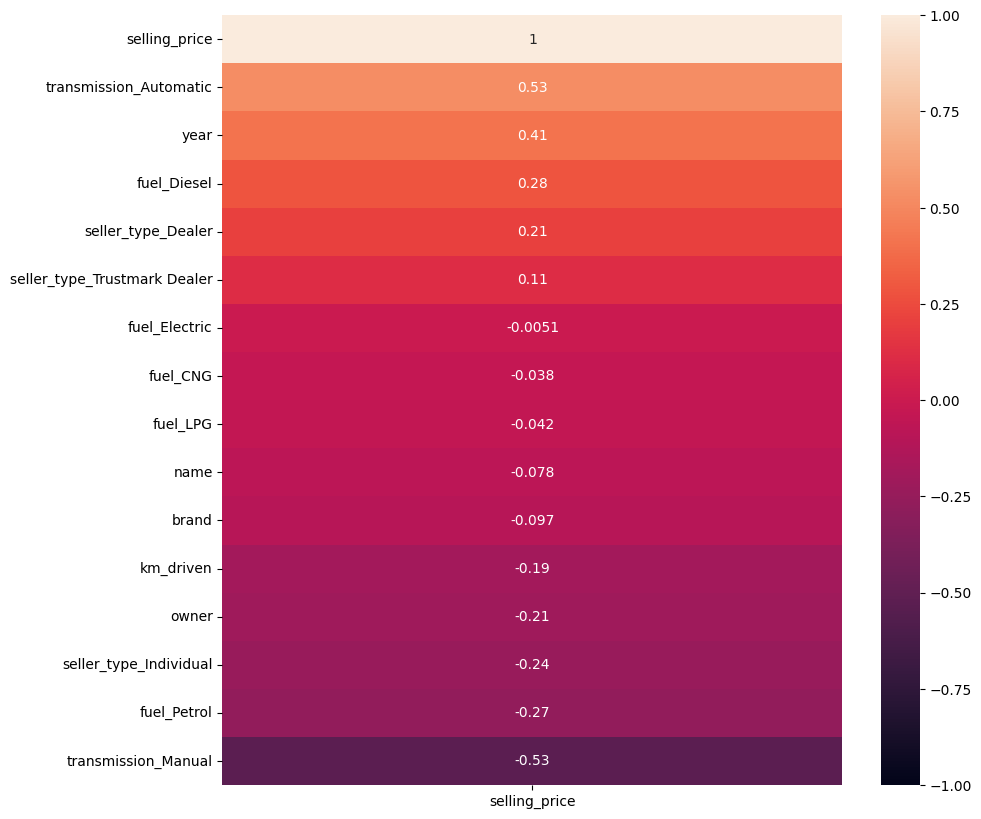

In [87]:
#new heatmap
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)
plt.show()

In [88]:
sta1 = df['selling_price'].mean()
sta2 = df['selling_price'].count()
sta3 = df['selling_price'].std()
sta4 = df['selling_price'].min()
sta5 = df['selling_price'].quantile(q=0.25)
sta6 = df['selling_price'].quantile(q=0.50)
sta7 = df['selling_price'].quantile(q=0.75)
sta8 = df['selling_price'].max()
sta9 = df['selling_price'].median()

The heatmap may be inaccurate because it is a little different from what we have previously extracted, but it gives us an indication of the impact of all the different factors on the price of the car. There are no surprises. The results were expected and identical to what we find before.

I will make things brief. Through our journey in analyzing the data, we found that

1.Best selling brand is Maruti then Hyundai 2.Manuals sell more than automatics 3.The newer the car the better it sells 4.Individual sell more 5.Petrol and Diesel sell more 6.Most sales were made in 2017

There are factors that affect on car price

1.The year, the newer the year, the higher the price 2.The KM Driving when increase price of car decreased 3.Brand and model of the car

Other factors important but these are the main factors

Please, if you have any ideas or modifications can improve the code or analysis tell me about it in the comments. I want to constantly develop this notebook . I am here to learn and develop my skills and my experiences.

Also, if you have any questions or inquiries related to this code or analysis or anything not clear in this notebook tell me about it the comments

I tried as much as possible to make the code clear and easy to be useful to those who see it and be able to learn from it

We are all here to help each other and learn from each other

So I will wait your advice to improve my skills and experience and also feel free to ask about anything is not clear to you to improve your skills and experience

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4340 non-null   int64  
 1   year                          4340 non-null   int64  
 2   selling_price                 4340 non-null   int64  
 3   km_driven                     4340 non-null   int64  
 4   fuel                          4340 non-null   object 
 5   seller_type                   4340 non-null   object 
 6   transmission                  4340 non-null   object 
 7   owner                         4340 non-null   int64  
 8   brand                         4340 non-null   int64  
 9   fuel_CNG                      4340 non-null   float64
 10  fuel_Diesel                   4340 non-null   float64
 11  fuel_Electric                 4340 non-null   float64
 12  fuel_LPG                      4340 non-null   float64
 13  fue

<Axes: xlabel='name'>

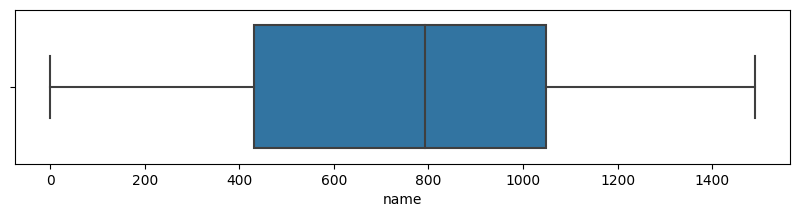

In [90]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df['name'])

In [91]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual'],
      dtype='object')

In [92]:
df['seller_type_Trustmark_Dealer'] = df['seller_type_Trustmark Dealer']
df.drop("seller_type_Trustmark Dealer" ,axis=1,  inplace=True)

In [93]:
df.dtypes

name                              int64
year                              int64
selling_price                     int64
km_driven                         int64
fuel                             object
seller_type                      object
transmission                     object
owner                             int64
brand                             int64
fuel_CNG                        float64
fuel_Diesel                     float64
fuel_Electric                   float64
fuel_LPG                        float64
fuel_Petrol                     float64
seller_type_Dealer              float64
seller_type_Individual          float64
transmission_Automatic          float64
transmission_Manual             float64
seller_type_Trustmark_Dealer    float64
dtype: object

In [94]:
#Applying Model building
# Linear Rerression
#For that we need to sacle data to get the best fit line which will predict price of car.


In [95]:
df1 = df.drop(columns=["seller_type", "transmission", "fuel"], axis=1)


<Axes: >

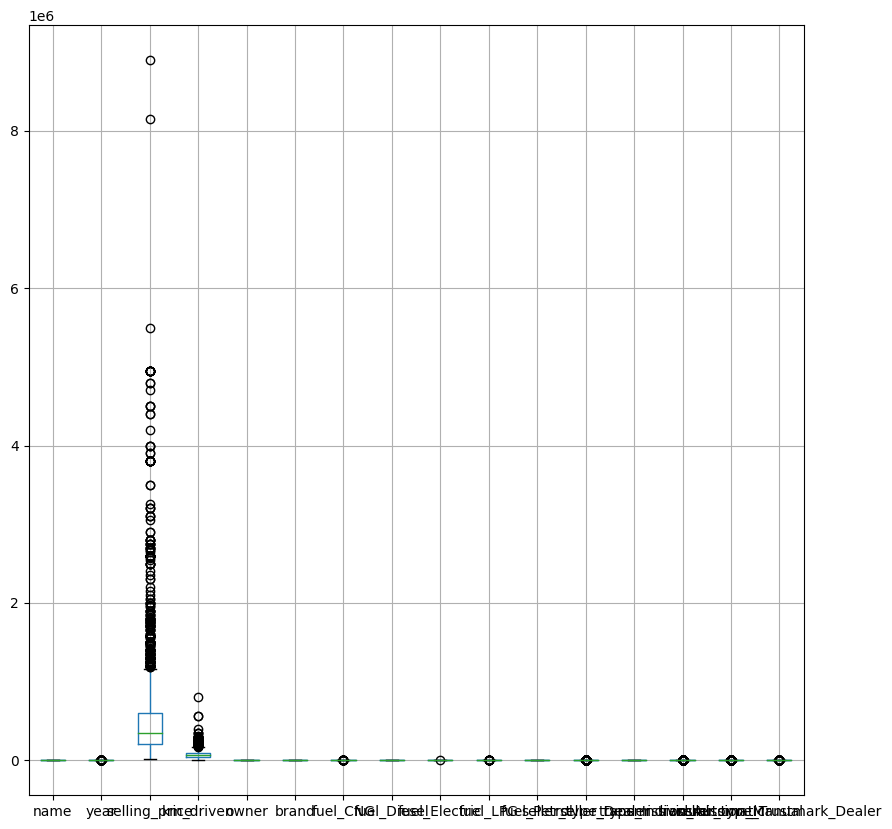

In [96]:
df1.boxplot()

def remove_outlier(col): sorted(col) Q1,Q3=np.percentile(col,[25,75]) IQR=Q3-Q1 lower_range= Q1-(1.5 * IQR) upper_range= Q3+(1.5 * IQR) return lower_range, upper_range

for column in df1.columns: lr,ur=remove_outlier(df1[column]) df1[column]=np.where(df1[column]>ur,ur,df1[column]) df1[column]=np.where(df1[column]<lr,lr,df1[column])

plt.figure(figsize=(10,10)) df1.boxplot() plt.title('After Outlier Removal',fontsize=16) plt.show()

In [97]:
X=df1.drop(columns=["selling_price"], axis=1)
          #inplace=True)
#X=df.drop('selling_price', axis=1)
y=df1[['selling_price']]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=30)

In [167]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [168]:
LinearRegression()

LinearRegression()

In [169]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for name is 403.5957629255935
The coefficient for year is 36351.31928600849
The coefficient for km_driven is -0.8223120826369268
The coefficient for owner is -12138.224957653927
The coefficient for brand is -27560.570854464127
The coefficient for fuel_CNG is 47739.42723927974
The coefficient for fuel_Diesel is 337020.4783637299
The coefficient for fuel_Electric is -471740.06527448416
The coefficient for fuel_LPG is 44575.13567556791
The coefficient for fuel_Petrol is 42405.02399590428
The coefficient for seller_type_Dealer is -58132.34978080394
The coefficient for seller_type_Individual is -109300.87605774307
The coefficient for transmission_Automatic is 418422.3294532212
The coefficient for transmission_Manual is -418422.3294532208
The coefficient for seller_type_Trustmark_Dealer is 167433.22583854687


In [170]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -72251105.25353682


In [171]:
regression_model.score(X_train, y_train)

0.47543926185090846

In [172]:
ypred = regression_model.predict(X)
print(ypred)

[[-20191.03293045]
 [103611.6816605 ]
 [543025.36623412]
 ...
 [ 18352.29017784]
 [646607.88960175]
 [346800.14299922]]


In [173]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.4454893618394735

In [174]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head(25)

,name,year,km_driven,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,seller_type_Trustmark_Dealer,selling_price
2143,637,2018,80000,0,17,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,700000
1305,634,2015,70000,2,17,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,640000
3318,811,2007,52000,2,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,100000
2725,67,2014,146000,0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,300000
2284,1113,2012,110000,0,21,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,300000
3417,342,2008,90000,0,9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,320000
4208,1432,2001,256000,0,26,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,150000
1231,1241,2011,90000,4,25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,140000
2717,421,2008,110000,2,10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110000
3898,1219,2010,300000,4,25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,90000


In [175]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'brand',
       'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'transmission_Automatic', 'transmission_Manual',
       'seller_type_Trustmark_Dealer'],
      dtype='object')

In [176]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'selling_price ~ km_driven+owner+brand + fuel_CNG + fuel_Diesel + fuel_Electric + fuel_LPG + fuel_Petrol + seller_type_Dealer + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Automatic + transmission_Manual ', data = data_train).fit()
lm1.params

Intercept                       474144.563800
km_driven                           -2.039876
owner                           -47145.365075
brand                            -4296.573855
fuel_CNG                        219750.237787
fuel_Diesel                     508871.016763
fuel_Electric                  -596733.013466
fuel_LPG                        185924.854971
fuel_Petrol                     156331.467745
seller_type_Dealer               86973.341797
seller_type_Individual           32726.132076
seller_type_Trustmark_Dealer    354445.089927
transmission_Automatic          678089.073030
transmission_Manual            -203944.509230
dtype: float64

In [177]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:45:33   Log-Likelihood:                -43715.
No. Observations:                3038   AIC:                         8.745e+04
Df Residuals:                    3027   BIC:                         8.752e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [178]:
# Let us check the sum of squared errors by predicting value of y for test cases and subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)
mse

selling_price    2.033878e+11
dtype: float64

In [179]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

450985.4051263039

Creating a model using bagging

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [224]:
# Assuming you have your features in X and labels in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [225]:
# Create the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=30)

In [226]:
# Create the Bagging Classifier using the base classifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=30)

In [227]:
# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=30),
                  random_state=30)

In [228]:
# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

In [229]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.26881720430107525


Model using ensemble

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [231]:
# Create the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=30)

In [232]:
# Train the Random Forest classifier
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [233]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)


In [234]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2665130568356375


Finding out the best model

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [218]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [237]:
# Create a list of classifiers to evaluate
classifiers = [
    ("regression_model ", LinearRegression()),
    ("base_classifier", DecisionTreeClassifier(random_state=30)),
    ("random_forest_model", RandomForestClassifier(n_estimators=100, random_state=30))
]

Saving the trained model

In [148]:
import pickle

In [149]:
filename = 'trained_model.sav'
pickle.dump(regression_model,open(filename, 'wb'))

Loading the saved model

In [150]:
loaded_model = pickle.load(open('/content/trained_model.sav','rb'))